In [2]:
import yfinance as yf
import backtrader as bt
import pandas as pd
from datetime import datetime

#### Define strategy

In [3]:
# Define the strategy
class SmaCross(bt.Strategy):
    params = (('pfast', 50), ('pslow', 200),)  # Fast and slow MA periods

    def __init__(self):
        sma_fast = bt.ind.SMA(self.data, period=self.params.pfast)
        sma_slow = bt.ind.SMA(self.data, period=self.params.pslow)
        self.crossover = bt.ind.CrossOver(sma_fast, sma_slow)

    def next(self):
        if not self.position:  # Not in the market
            if self.crossover > 0:  # Fast MA crosses above slow MA
                self.buy()  # Enter long position
        elif self.crossover < 0:  # Fast MA crosses below slow MA
            self.close()  # Exit long position


### Fetch Data

#### Yahoo Finance

In [5]:
# Fetch data from Yahoo Finance
ticker = yf.Ticker("GOOGL")
df = ticker.history(period="5y")

# Convert to Pandas DataFrame
df = pd.DataFrame(df)

# Convert the index to datetime format (important for backtrader)
df.index = pd.to_datetime(df.index)

# Create a Backtrader data feed
data = bt.feeds.PandasData(dataname=df)

#### Binance

In [4]:
# from binance import Client
# import pandas as pd
# import backtrader as bt

# client = Client(api_key='YOUR_API_KEY', api_secret='YOUR_API_SECRET')

# # Get historical klines for BTCUSDT (Bitcoin/USDT)
# klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2023")

# # Convert to Pandas DataFrame
# df = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# # Convert to backtrader format
# df = df[['timestamp','open','high','low','close','volume']] # rearrange columns
# df.set_index('timestamp', inplace=True)

# # Create a Backtrader data feed
# data = bt.feeds.PandasData(dataname=df)

#### Run backtesting on the strategy

In [6]:
# import matplotlib
# matplotlib.use('TkAgg')
# from matplotlib import pyplot as plt
# plt.ion()

# plt.hist([3,8,10])

In [7]:
# Create a cerebro instance
cerebro = bt.Cerebro()

cerebro.adddata(data)

# Add your strategy (replace with your actual strategy)
cerebro.addstrategy(SmaCross)

# Set our desired cash start
# cerebro.broker.setcash(500.0)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the backtest
cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 10000.00
Final Portfolio Value: 10133.20


### Test the SMA stragegy in the strategies/SMA file

In [11]:
from src.strategies.SMA import SMA

# Create a cerebro instance
cerebro = bt.Cerebro()

cerebro.adddata(data)

cerebro.addstrategy(SMA)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


#### Plot the visualizetion of the results

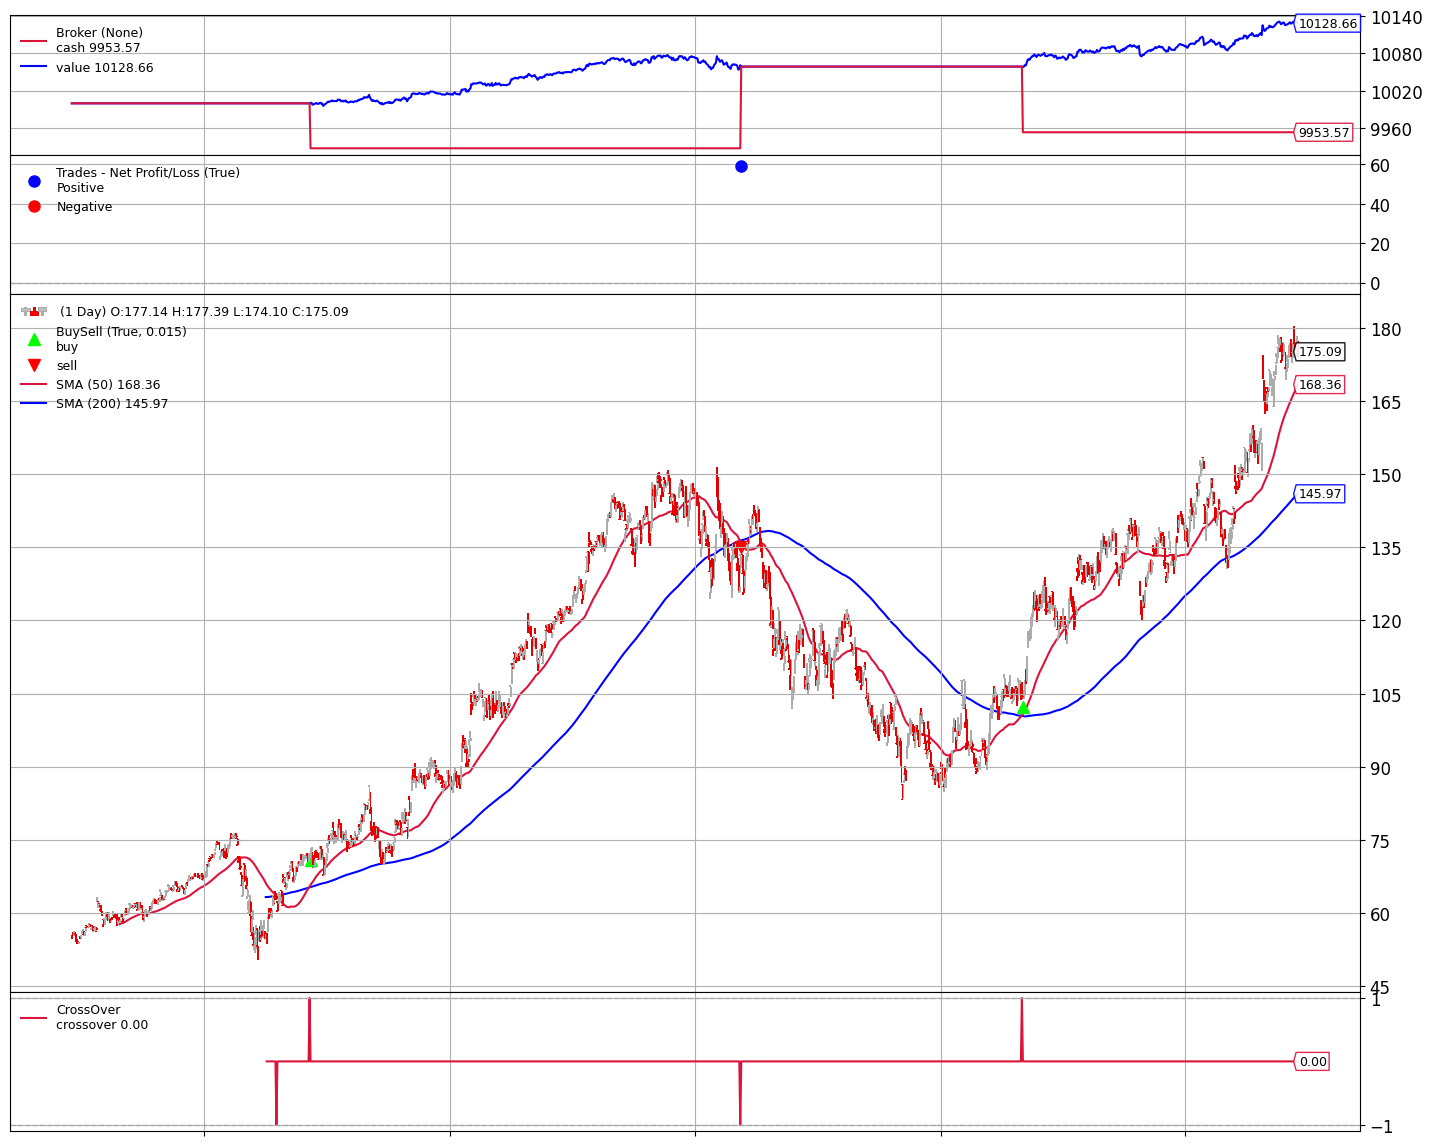

[[<Figure size 1500x1200 with 4 Axes>]]

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
# cerebro.plot(iplot = False)

cerebro.plot(iplot=False, volume=False, style='candlestick')